# US Accidents Data Analysis 2016-2023

This is a countrywide car accident dataset that covers 49 states of the USA. The accident data were collected from February 2016 to March 2023, using multiple APIs that provide streaming traffic incident (or event) data. These APIs broadcast traffic data captured by various entities, including the US and state departments of transportation, law enforcement agencies, traffic cameras, and traffic sensors within the road networks.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import FunctionTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans
from sklearn.metrics import mean_absolute_error, root_mean_squared_error, mean_squared_error

import plotly.express as px
import folium
from folium.plugins import HeatMap
import warnings
warnings.simplefilter('ignore')
elec_type_colors = ['green', 'gold']
cmap = 'RdYlBu_r'

In [3]:
df = pd.read_csv("./data/US_Accidents_March23.csv")
df.head(3)

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.01,...,False,False,False,False,True,False,Night,Night,Day,Day


In [4]:
df.drop(columns=["End_Time","End_Lat", "End_Lng"], inplace= True)

In [5]:
df.shape

(7728394, 43)

In [6]:
df.dropna(inplace=True)
df.isnull().sum().sum()

np.int64(0)

### DF Columns
Severity, Start_Time, Start_Lat, Start_Lng, Distance(mi), Description, Street, City, County, State, Zipcode, Country, 
 Timezone, Airport_Code, Weather_Timestamp, Temperature(F),Wind_Chill(F), Humidity(%), Pressure(in), Visibility(mi),Wind_Direction, Wind_Speed(mph), Precipitation(in),Weather_Condition, Amenity, Bump, Crossing, Give_Way, Junction,No_Exit, Railway, Roundabout, Station, Stop, Traffic_Calming,
 Traffic_Signal, Turning_Loop, Sunrise_Sunset, Civil_Twilight, Nautical_Twilight, Astronomical_Twilight

### df_eda

Severity, State, Start_Time, Start_Lat, Start_Lng, Year, Months, Amenity, Bump, Crossing, Give_Way, Junction, No_Exit,  Railway, Roundabout, Station, Stop, Traffic_Calming, Traffic_Signal, Turning_Loop

### df_data_handling

Temperature(F),Wind_Chill(F), Humidity(%), Pressure(in), Visibility(mi),Wind_Direction, Wind_Speed(mph), Precipitation(in),Weather_Condition, Severity

In [7]:
df.describe()

,Severity,Start_Lat,Start_Lng,Distance(mi),Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,5.208003e+06,5.208003e+06,5.208003e+06,5.208003e+06,5.208003e+06,5.208003e+06,5.208003e+06,5.208003e+06,5.208003e+06,5.208003e+06,5.208003e+06
mean,2.147938e+00,3.616199e+01,-9.415568e+01,6.619877e-01,6.134877e+01,6.002668e+01,6.492046e+01,2.935769e+01,9.016998e+00,7.376984e+00,6.108718e-03
std,4.446306e-01,5.193297e+00,1.734129e+01,1.842545e+00,1.920820e+01,2.146167e+01,2.280444e+01,1.100592e+00,2.625947e+00,5.510896e+00,6.035688e-02
min,1.000000e+00,2.455480e+01,-1.245481e+02,0.000000e+00,-4.500000e+01,-6.300000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,3.329193e+01,-1.171154e+02,0.000000e+00,4.800000e+01,4.700000e+01,4.800000e+01,2.918000e+01,1.000000e+01,3.000000e+00,0.000000e+00
50%,2.000000e+00,3.583557e+01,-8.678144e+01,9.600000e-02,6.400000e+01,6.400000e+01,6.700000e+01,2.968000e+01,1.000000e+01,7.000000e+00,0.000000e+00
75%,2.000000e+00,4.013500e+01,-8.028513e+01,6.350000e-01,7.600000e+01,7.600000e+01,8.400000e+01,2.995000e+01,1.000000e+01,1.000000e+01,0.000000e+00
max,4.000000e+00,4.900220e+01,-6.748413e+01,4.417500e+02,1.960000e+02,1.960000e+02,1.000000e+02,5.863000e+01,1.000000e+02,1.087000e+03,3.647000e+01


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5208003 entries, 5 to 7728393
Data columns (total 43 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Source                 object 
 2   Severity               int64  
 3   Start_Time             object 
 4   Start_Lat              float64
 5   Start_Lng              float64
 6   Distance(mi)           float64
 7   Description            object 
 8   Street                 object 
 9   City                   object 
 10  County                 object 
 11  State                  object 
 12  Zipcode                object 
 13  Country                object 
 14  Timezone               object 
 15  Airport_Code           object 
 16  Weather_Timestamp      object 
 17  Temperature(F)         float64
 18  Wind_Chill(F)          float64
 19  Humidity(%)            float64
 20  Pressure(in)           float64
 21  Visibility(mi)         float64
 22  Wind_Direction         

# Exploratory Data Analysis!

### Total Number of Accidents!

In [9]:
total_number_of_accidents = len(df["ID"].value_counts())
print(f'Total Number of accidents that took place between 2016 and 2023 in US are {total_number_of_accidents}.')

Total Number of accidents that took place between 2016 and 2023 in US are 5208003.


Creating a new Dataset for EDA!

In [10]:
df["Start_Time"] = pd.to_datetime(df['Start_Time'], errors='coerce')
df.dropna(subset=["Start_Time"], inplace=True)
df['Year'] = df['Start_Time'].dt.year
df['Month'] = df['Start_Time'].dt.month

In [11]:
df_eda = df[["Severity", "State", "Start_Time", "Start_Lat", "Start_Lng", "Year", "Month", "Amenity", "Bump", "Crossing", "Give_Way", "Junction", "No_Exit",  "Railway", "Roundabout", "Station", "Stop", "Traffic_Calming", "Traffic_Signal", "Turning_Loop"]]

In [12]:
df_eda.head(3)

,Severity,State,Start_Time,Start_Lat,Start_Lng,Year,Month,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop
5,3,OH,2016-02-08 07:44:26,40.100590,-82.925194,2016,2,False,False,False,False,False,False,False,False,False,False,False,False,False
9,3,OH,2016-02-08 08:10:04,40.100590,-82.925194,2016,2,False,False,False,False,False,False,False,False,False,False,False,False,False
11,3,OH,2016-02-08 08:21:27,39.932709,-82.830910,2016,2,False,False,False,False,False,False,False,False,False,False,False,False,False


In [13]:
df_eda.isnull().sum()

Severity           0
State              0
Start_Time         0
Start_Lat          0
Start_Lng          0
Year               0
Month              0
Amenity            0
Bump               0
Crossing           0
Give_Way           0
Junction           0
No_Exit            0
Railway            0
Roundabout         0
Station            0
Stop               0
Traffic_Calming    0
Traffic_Signal     0
Turning_Loop       0
dtype: int64

### Number of Accidents Depending on Severity Level:

In [14]:
df['Severity'].value_counts().to_frame().style.bar(cmap=cmap)

,count
Severity,
2,3765605
3,583095
4,107099
1,61920


In [15]:
print("Most Accidents have severity level of 2.") 

Most Accidents have severity level of 2.


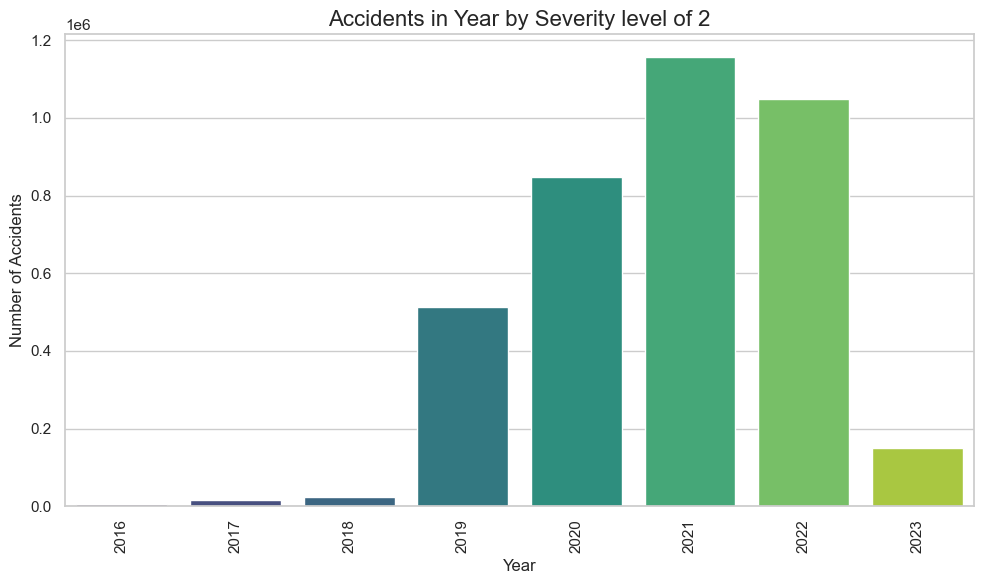

In [16]:
severity = 2
df_severity = df_eda[df_eda['Severity'] == severity]

# Aggregate accident counts by state
Severity_accidents = df_severity.groupby('Year').size().reset_index(name='Accident_Count')

# Set up the seaborn style
sns.set(style="whitegrid")

# Create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Year', y='Accident_Count', data=Severity_accidents, palette='viridis')

# Customize the plot
plt.title(f'Accidents in Year by Severity level of {severity}', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Accidents', fontsize=12)
plt.tick_params(axis='x', rotation=90)  # Rotate the x-axis labels for readability

# Display the plot
plt.tight_layout()  # Adjust layout to fit everything
plt.show()

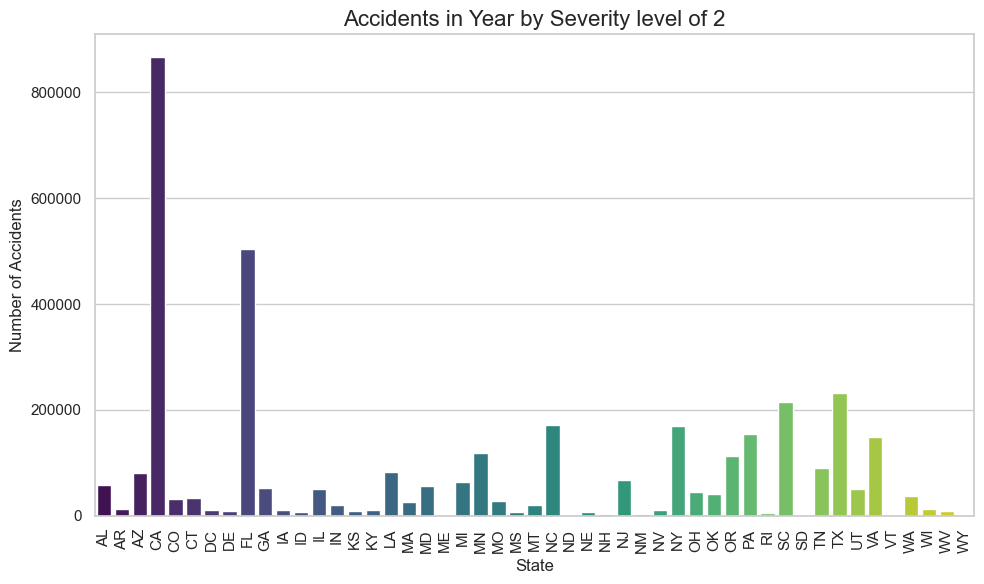

In [17]:
severity = 2
df_severity = df_eda[df_eda['Severity'] == severity]

# Aggregate accident counts by state
Severity_accidents = df_severity.groupby('State').size().reset_index(name='Accident_Count')

# Set up the seaborn style
sns.set(style="whitegrid")

# Create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='State', y='Accident_Count', data=Severity_accidents, palette='viridis')

# Customize the plot
plt.title(f'Accidents in Year by Severity level of {severity}', fontsize=16)
plt.xlabel('State', fontsize=12)
plt.ylabel('Number of Accidents', fontsize=12)
plt.tick_params(axis='x', rotation=90)  # Rotate the x-axis labels for readability

# Display the plot
plt.tight_layout()  # Adjust layout to fit everything
plt.show()

In [18]:
df['Year'].value_counts().to_frame().style.bar(cmap=cmap)

,count
Year,
2021,1322250
2022,1183172
2020,1077316
2019,703448
2023,154669
2018,40470
2017,26843
2016,9551


In [19]:
print("Most no. of Accidents took place in the year 2021 and 2022. And Least no. of Accident took place in the year 2016 and 2023.") 

Most no. of Accidents took place in the year 2021 and 2022. And Least no. of Accident took place in the year 2016 and 2023.


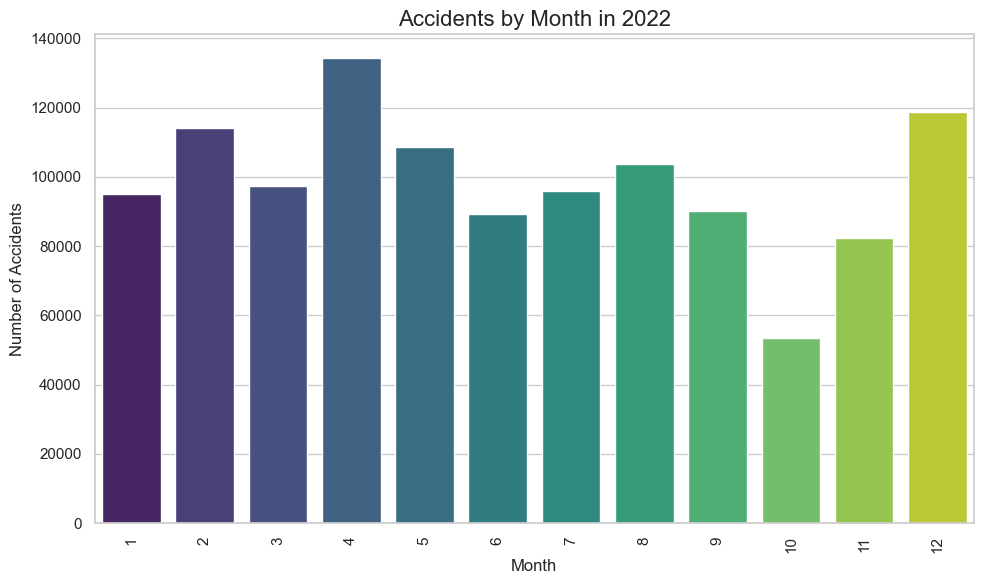

In [20]:
year = 2022
df_year = df_eda[df_eda['Year'] == year]

# Aggregate accident counts by state
year_accidents = df_year.groupby('Month').size().reset_index(name='Accident_Count')

# Set up the seaborn style
sns.set(style="whitegrid")

# Create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Month', y='Accident_Count', data=year_accidents, palette='viridis')

# Customize the plot
plt.title(f'Accidents by Month in {year}', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Number of Accidents', fontsize=12)
plt.tick_params(axis='x', rotation=90)  # Rotate the x-axis labels for readability

# Display the plot
plt.tight_layout()  # Adjust layout to fit everything
plt.show()

### Number of Accidents that took place in Each State in the Selected Period(2016-2023):

In [21]:
df['State'].value_counts().to_frame().style.bar(cmap=cmap)

,count
State,
CA,963574
FL,562560
TX,293367
SC,242845
NY,209241
NC,199562
VA,187085
PA,182272
MN,130220


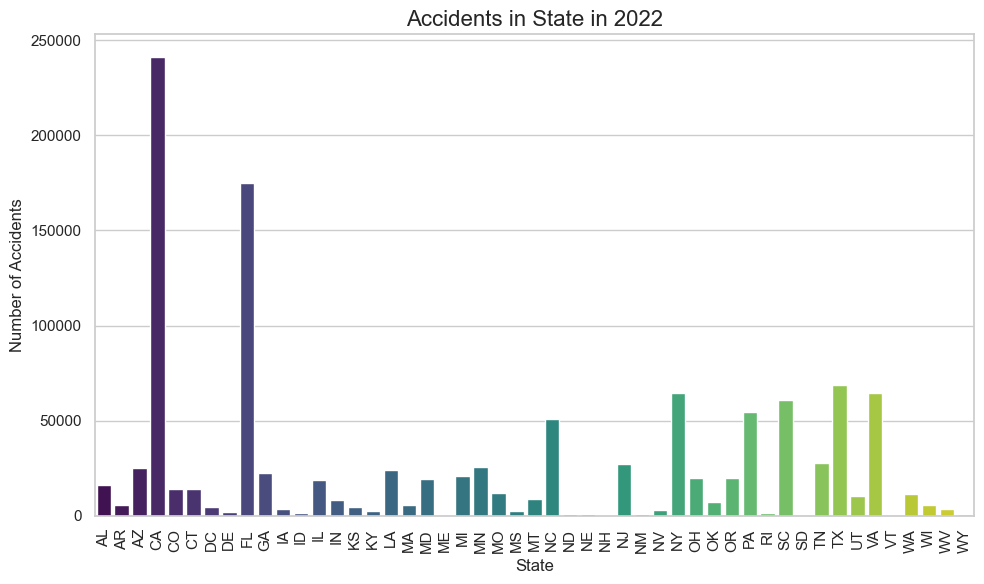

In [22]:
year =2022
df_year = df[df['Year'] == year]

# Aggregate accident counts by state
state_accidents = df_year.groupby('State').size().reset_index(name='Accident_Count')

# Set up the seaborn style
sns.set(style="whitegrid")

# Create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='State', y='Accident_Count', data=state_accidents, palette='viridis')

# Customize the plot
plt.title(f'Accidents in State in {year}', fontsize=16)
plt.xlabel('State', fontsize=12)
plt.ylabel('Number of Accidents', fontsize=12)
plt.tick_params(axis='x', rotation=90)  # Rotate the x-axis labels for readability

# Display the plot
plt.tight_layout()  # Adjust layout to fit everything
plt.show()

### Number of Accidents that took in the Selected Period (2016-2023) at Different Places:

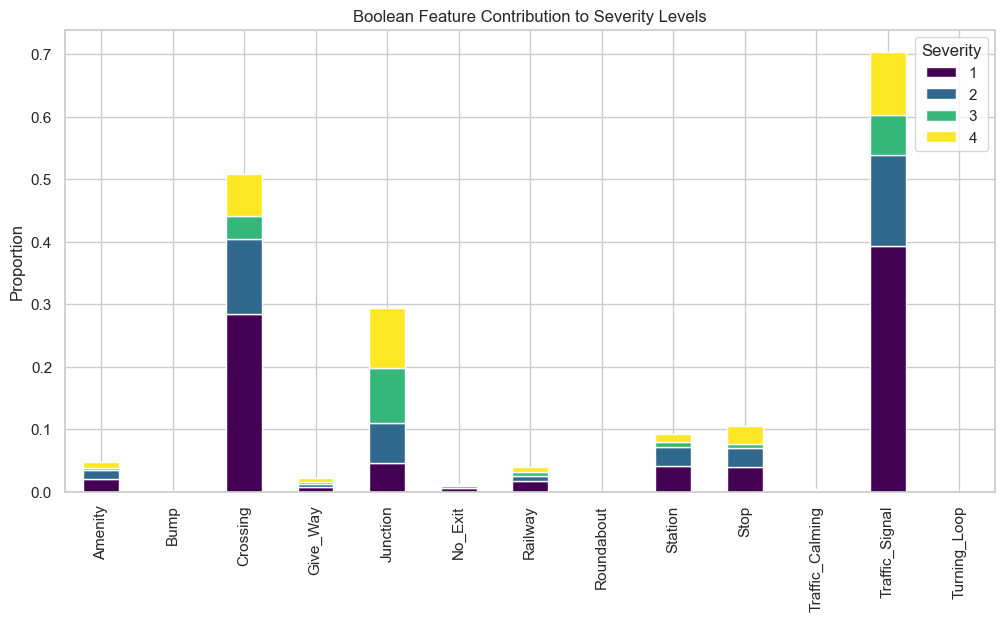

In [23]:
bool_columns = [
    "Amenity",
    "Bump",
    "Crossing",
    "Give_Way",
    "Junction",
    "No_Exit",
    "Railway",
    "Roundabout",
    "Station",
    "Stop",
    "Traffic_Calming",
    "Traffic_Signal",
    "Turning_Loop",
]

severity_bool_analysis = df.groupby("Severity")[bool_columns].mean()

severity_bool_analysis.T.plot(
    kind="bar", figsize=(12, 6), stacked=True, colormap="viridis"
)
plt.title("Boolean Feature Contribution to Severity Levels")
plt.ylabel("Proportion")
plt.show()

### The number of Accidents that took place for a particular state in a particular year!

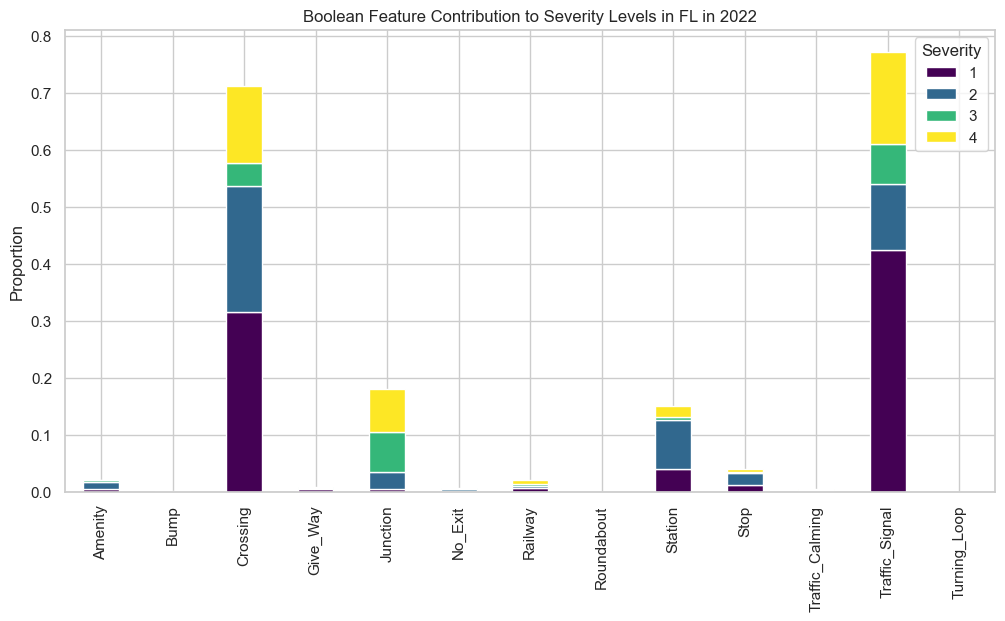

In [24]:
state = "FL"
year = 2022
df_selected_state_year = df[df["State"]==state][df["Year"]==year]
bool_columns = [
    "Amenity",
    "Bump",
    "Crossing",
    "Give_Way",
    "Junction",
    "No_Exit",
    "Railway",
    "Roundabout",
    "Station",
    "Stop",
    "Traffic_Calming",
    "Traffic_Signal",
    "Turning_Loop",
]

severity_bool_analysis = df_selected_state_year.groupby("Severity")[bool_columns].mean()

severity_bool_analysis.T.plot(
    kind="bar", figsize=(12, 6), stacked=True, colormap="viridis"
)
plt.title(f"Boolean Feature Contribution to Severity Levels in {state} in {year}")
plt.ylabel("Proportion")
plt.show()

In [25]:
df_selected_state_year.head(3)

,ID,Source,Severity,Start_Time,Start_Lat,Start_Lng,Distance(mi),Description,Street,City,...,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Year,Month
512238,A-512252,Source2,3,2022-09-08 06:35:30,26.410135,-80.089828,0.0,Three lanes blocked due to crash on I-95 North...,I-95,Boca Raton,...,False,False,False,False,Night,Night,Day,Day,2022,9
512239,A-512253,Source2,2,2022-09-08 06:49:20,27.937590,-82.121178,0.0,Lane blocked due to crash on FL-60 at FL-39 Ja...,J L Redman Pkwy,Plant City,...,False,False,True,False,Night,Day,Day,Day,2022,9
512244,A-512258,Source2,1,2022-09-08 06:18:45,26.616896,-81.714752,0.0,Crash on CR-884 Lee Blvd at Gunnery Rd.,Lee Blvd,Lehigh Acres,...,False,False,True,False,Night,Night,Day,Day,2022,9


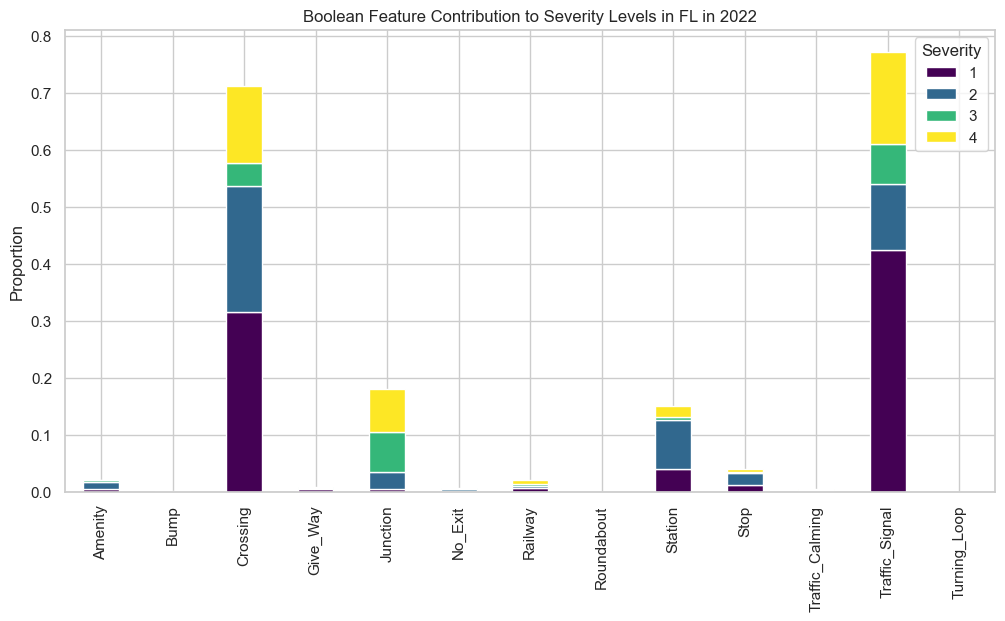

In [26]:
bool_columns = [
    "Amenity",
    "Bump",
    "Crossing",
    "Give_Way",
    "Junction",
    "No_Exit",
    "Railway",
    "Roundabout",
    "Station",
    "Stop",
    "Traffic_Calming",
    "Traffic_Signal",
    "Turning_Loop",
]

severity_bool_analysis = df_selected_state_year.groupby("Severity")[bool_columns].mean()

severity_bool_analysis.T.plot(
    kind="bar", figsize=(12, 6), stacked=True, colormap="viridis"
)
plt.title(f"Boolean Feature Contribution to Severity Levels in {state} in {year}")
plt.ylabel("Proportion")
plt.show()

In [27]:
# Filter data with valid latitude and longitude
# geo_data = df_eda[['Start_Lat', 'Start_Lng']].dropna()
# map_center = [geo_data['Start_Lat'].mean(), geo_data['Start_Lng'].mean()]
# heatmap = folium.Map(location=map_center, zoom_start=6)
# HeatMap(geo_data.values).add_to(heatmap)
# heatmap.save("heatmap.html")


# Data Preprocessing:
• Identifying and Handling Missing Values (done)

• Label Encoding (done)

• Outlier Detection and Removal

• Feature Scaling (Standardization and Normalization)

• Handling Duplicate Data (done)

• Data Type Transformation (done)

In [28]:
df.head(3)

,ID,Source,Severity,Start_Time,Start_Lat,Start_Lng,Distance(mi),Description,Street,City,...,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Year,Month
5,A-6,Source2,3,2016-02-08 07:44:26,40.100590,-82.925194,0.01,Accident on I-270 Outerbelt Northbound near Ex...,Westerville Rd,Westerville,...,False,False,False,False,Day,Day,Day,Day,2016,2
9,A-10,Source2,3,2016-02-08 08:10:04,40.100590,-82.925194,0.01,Right hand shoulder blocked due to accident on...,Westerville Rd,Westerville,...,False,False,False,False,Day,Day,Day,Day,2016,2
11,A-12,Source2,3,2016-02-08 08:21:27,39.932709,-82.830910,0.01,One lane blocked due to accident on I-70 Westb...,I-70 E,Reynoldsburg,...,False,False,False,False,Day,Day,Day,Day,2016,2


In [29]:
df_data_handling = df[["Distance(mi)","Temperature(F)","Humidity(%)", "Pressure(in)", "Visibility(mi)","Wind_Direction", "Wind_Speed(mph)","Weather_Condition","Precipitation(in)", "Severity"]]

In [30]:
df_data_handling.duplicated()
df_data_handling = df_data_handling.drop_duplicates()

In [31]:
missing_values = df_data_handling.isnull().sum()

In [32]:
missing_values.sort_values(ascending=False)

Distance(mi)         0
Temperature(F)       0
Humidity(%)          0
Pressure(in)         0
Visibility(mi)       0
Wind_Direction       0
Wind_Speed(mph)      0
Weather_Condition    0
Precipitation(in)    0
Severity             0
dtype: int64

In [33]:
df_data_handling.head(3)

,Distance(mi),Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Weather_Condition,Precipitation(in),Severity
5,0.01,37.9,97.0,29.63,7.0,SSW,3.5,Light Rain,0.03,3
9,0.01,37.4,100.0,29.62,3.0,SSW,4.6,Light Rain,0.02,3
14,0.01,37.4,100.0,29.62,3.0,SSW,4.6,Light Rain,0.02,2


### Missing Values Handled!

In [34]:
la = LabelEncoder()
la.fit(df_data_handling["Wind_Direction"])

LabelEncoder()

In [35]:
df_data_handling["Wind_Direction"] = la.transform(df_data_handling["Wind_Direction"])

In [36]:
la.fit(df_data_handling["Weather_Condition"])

LabelEncoder()

In [37]:
df_data_handling["Weather_Condition"] = la.transform(df_data_handling["Weather_Condition"])

### Encoding of Categorical Data Columns Done!

In [38]:
df_data_handling.head(3)

,Distance(mi),Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Weather_Condition,Precipitation(in),Severity
5,0.01,37.9,97.0,29.63,7.0,14,3.5,53,0.03,3
9,0.01,37.4,100.0,29.62,3.0,14,4.6,53,0.02,3
14,0.01,37.4,100.0,29.62,3.0,14,4.6,53,0.02,2


In [39]:
df_data_handling.corr()

,Distance(mi),Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Weather_Condition,Precipitation(in),Severity
Distance(mi),1.000000,-0.046206,0.004912,-0.066351,-0.037283,0.007677,0.019431,0.012699,0.003489,0.036968
Temperature(F),-0.046206,1.000000,-0.345417,0.140667,0.263458,0.087668,0.035886,0.059286,-0.009141,-0.017916
Humidity(%),0.004912,-0.345417,1.000000,0.148595,-0.397590,-0.190116,-0.177945,0.109075,0.104981,0.017640
Pressure(in),-0.066351,0.140667,0.148595,1.000000,0.014867,-0.053913,-0.054399,-0.013489,0.007369,-0.029261
Visibility(mi),-0.037283,0.263458,-0.397590,0.014867,1.000000,0.081747,0.002512,-0.141287,-0.159867,-0.018126
Wind_Direction,0.007677,0.087668,-0.190116,-0.053913,0.081747,1.000000,0.380502,0.037535,-0.004658,0.013331
Wind_Speed(mph),0.019431,0.035886,-0.177945,-0.054399,0.002512,0.380502,1.000000,0.141501,0.030259,0.027983
Weather_Condition,0.012699,0.059286,0.109075,-0.013489,-0.141287,0.037535,0.141501,1.000000,0.082100,0.038634
Precipitation(in),0.003489,-0.009141,0.104981,0.007369,-0.159867,-0.004658,0.030259,0.082100,1.000000,0.015324
Severity,0.036968,-0.017916,0.017640,-0.029261,-0.018126,0.013331,0.027983,0.038634,0.015324,1.000000


### Outlier Detection Handling

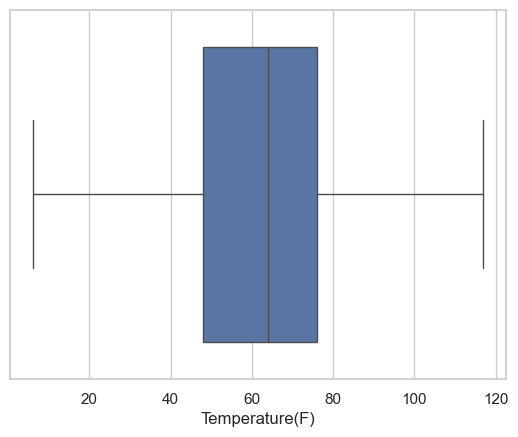

In [40]:
q1 = df_data_handling["Temperature(F)"].quantile(0.25)
q3 = df_data_handling["Temperature(F)"].quantile(0.75)
iqr = q3 - q1
min_value = q1 - 1.5 * iqr
max_value = q3 + 1.5 * iqr
new_df = df_data_handling[df_data_handling["Temperature(F)"]<=max_value]
df_data_handling = new_df[new_df["Temperature(F)"]>=min_value]
sns.boxplot(x="Temperature(F)", data = df_data_handling)
plt.show()

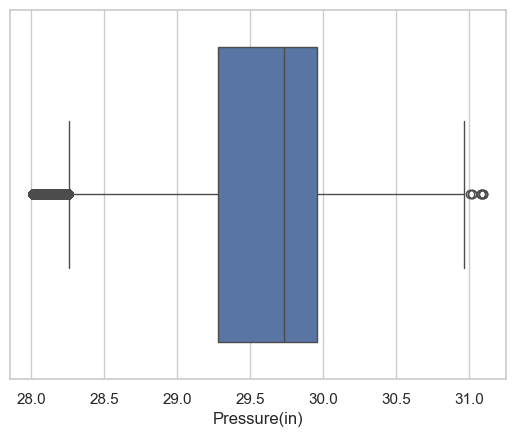

In [41]:
q1 = df_data_handling["Pressure(in)"].quantile(0.25)
q3 = df_data_handling["Pressure(in)"].quantile(0.75)
iqr = q3 - q1
min_value = q1 - 1.5 * iqr
max_value = q3 + 1.5 * iqr
new_df = df_data_handling[df_data_handling["Pressure(in)"]<=max_value]
df_data_handling = new_df[new_df["Pressure(in)"]>=min_value]
sns.boxplot(x="Pressure(in)", data = df_data_handling)
plt.show()

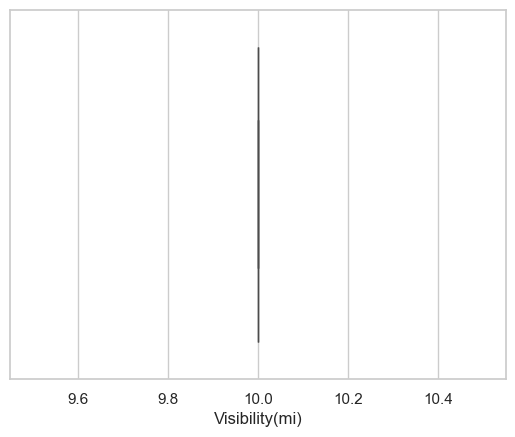

In [42]:
q1 = df_data_handling["Visibility(mi)"].quantile(0.25)
q3 = df_data_handling["Visibility(mi)"].quantile(0.75)
iqr = q3 - q1
min_value = q1 - 1.5 * iqr
max_value = q3 + 1.5 * iqr
new_df = df_data_handling[df_data_handling["Visibility(mi)"]<=max_value]
df_data_handling = new_df[new_df["Visibility(mi)"]>=min_value]
sns.boxplot(x="Visibility(mi)", data = df_data_handling)
plt.show()

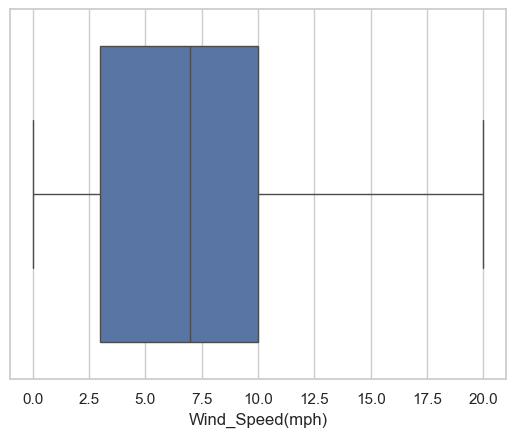

In [43]:
q1 = df_data_handling["Wind_Speed(mph)"].quantile(0.25)
q3 = df_data_handling["Wind_Speed(mph)"].quantile(0.75)
iqr = q3 - q1
min_value = q1 - 1.5 * iqr
max_value = q3 + 1.5 * iqr
new_df = df_data_handling[df_data_handling["Wind_Speed(mph)"]<=max_value]
df_data_handling = new_df[new_df["Wind_Speed(mph)"]>=min_value]
sns.boxplot(x="Wind_Speed(mph)", data = df_data_handling)
plt.show()

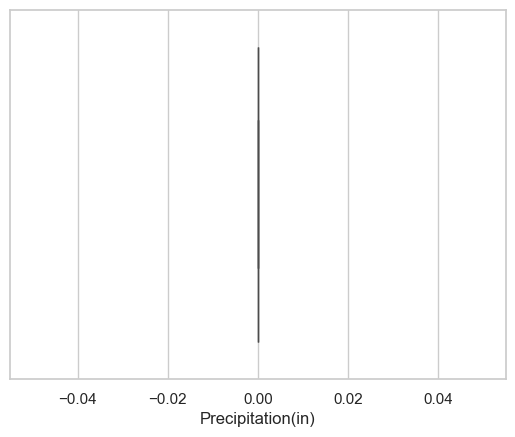

In [44]:
q1 = df_data_handling["Precipitation(in)"].quantile(0.25)
q3 = df_data_handling["Precipitation(in)"].quantile(0.75)
iqr = q3 - q1
min_value = q1 - 1.5 * iqr
max_value = q3 + 1.5 * iqr
new_df = df_data_handling[df_data_handling["Precipitation(in)"]<=max_value]
df_data_handling = new_df[new_df["Precipitation(in)"]>=min_value]
sns.boxplot(x="Precipitation(in)", data = df_data_handling)
plt.show()

In [45]:
df_data_handling.shape

(2638067, 10)

### Since After removing the outliers from the precipitation and Visibility the value remains constants!

In [46]:
sampled_df = df_data_handling.sample(n=50000, random_state=42)
sampled_df.drop(columns= ["Precipitation(in)", "Visibility(mi)"])


,Distance(mi),Temperature(F),Humidity(%),Pressure(in),Wind_Direction,Wind_Speed(mph),Weather_Condition,Severity
6118854,0.011,77.0,16.0,29.92,8,13.0,13,2
6877660,0.266,68.0,93.0,29.94,11,10.0,72,2
5540053,0.619,73.0,79.0,30.02,2,5.0,13,2
2103784,0.000,50.0,100.0,28.22,0,0.0,53,2
6284979,0.291,53.0,59.0,30.04,0,0.0,13,2
...,...,...,...,...,...,...,...,...
5436928,0.771,69.0,42.0,29.87,0,0.0,13,2
4310893,0.425,70.0,68.0,29.51,11,12.0,6,2
6624265,0.282,36.0,97.0,28.52,3,8.0,13,2
7093698,0.000,50.0,63.0,29.71,13,5.0,13,2


In [47]:
x = sampled_df.drop(columns="Severity")
y = sampled_df["Severity"]
ss = StandardScaler()
ss.fit(x)
x = pd.DataFrame(ss.transform(x), columns=x.columns)
x.head(3)

,Distance(mi),Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Weather_Condition,Precipitation(in)
0,-0.393676,0.700296,-2.163281,0.642716,0.0,-0.223490,1.216787,-0.571020,0.0
1,-0.228800,0.191738,1.541183,0.685955,0.0,0.204723,0.591883,1.468157,0.0
2,-0.000561,0.474270,0.867644,0.858914,0.0,-1.079915,-0.449623,-0.571020,0.0


In [48]:
x.shape, y.shape

((50000, 9), (50000,))

In [49]:
x.isnull().sum()

Distance(mi)         0
Temperature(F)       0
Humidity(%)          0
Pressure(in)         0
Visibility(mi)       0
Wind_Direction       0
Wind_Speed(mph)      0
Weather_Condition    0
Precipitation(in)    0
dtype: int64

In [50]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Distance(mi)       50000 non-null  float64
 1   Temperature(F)     50000 non-null  float64
 2   Humidity(%)        50000 non-null  float64
 3   Pressure(in)       50000 non-null  float64
 4   Visibility(mi)     50000 non-null  float64
 5   Wind_Direction     50000 non-null  float64
 6   Wind_Speed(mph)    50000 non-null  float64
 7   Weather_Condition  50000 non-null  float64
 8   Precipitation(in)  50000 non-null  float64
dtypes: float64(9)
memory usage: 3.4 MB


### Train - Test Splitting Done!

In [ ]:
# ft = FunctionTransformer(func=lambda x: x**2)
# ft.fit(df[["IQ"]])
# df["IQ_ft"] = ft.transform(df[["IQ"]])

In [51]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=42)

In [52]:
# sns.pairplot(data=df_data_handling, hue="Severity")
# plt.show()

In [52]:
lr = LogisticRegression(multi_class="multinomial")
lr.fit(x_train,y_train)

LogisticRegression(multi_class='multinomial')

In [93]:
# y_test
lr.max_iter

100

In [99]:
print(mean_squared_error(y_test, lr.predict(x_test)))
print(mean_absolute_error(y_test, lr.predict(x_test)))
print(root_mean_squared_error(y_test, lr.predict(x_test)))

0.2471
0.1987
0.4970915408654627


In [54]:
lr.score(x_test,y_test)*100

82.55

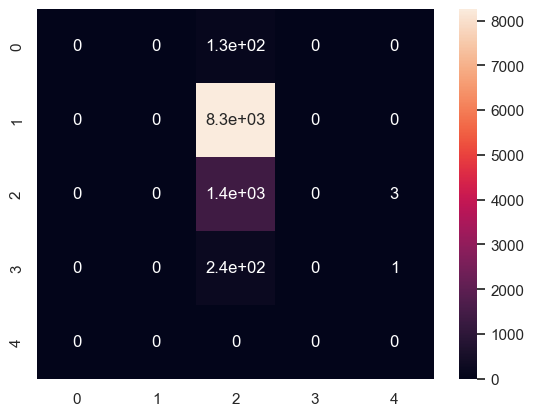

In [55]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
prd = lr.predict(x_test) 
# prd_adjusted = prd + 1
cm = confusion_matrix(y_test-1, prd)
sns.heatmap(cm, annot=True)
plt.show()

In [56]:
accuracy_score(y_test, lr.predict(x_test))*100

82.55

### DecisionTreeClassifier!

In [54]:
# for i in range(1,20):
#     dt2 = DecisionTreeClassifier(max_depth=i)
#     dt2.fit(x_train,y_train)
#     print(dt2.score(x_train,y_train)*100, dt2.score(x_test,y_test)*100)

In [ ]:
dt = DecisionTreeClassifier(max_depth=5)
dt.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=5)

In [95]:
accuracy_score(y_test,dt.predict(x_test))*100
# dt.max_iter

82.47

In [101]:
print(mean_squared_error(y_test, dt.predict(x_test)))
print(mean_absolute_error(y_test, dt.predict(x_test)))
print(root_mean_squared_error(y_test, dt.predict(x_test)))

0.2473
0.1993
0.49729267036625424


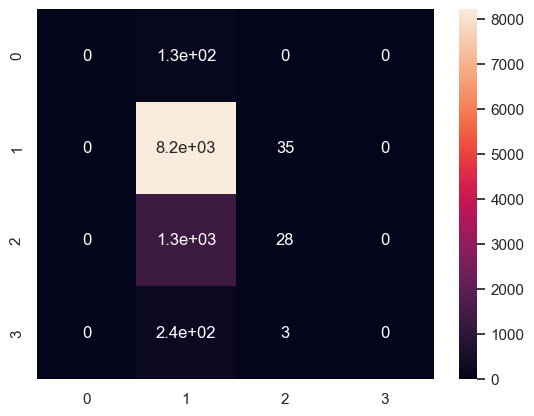

In [59]:

# X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
prd = dt.predict(x_test)
cm = confusion_matrix(y_test, prd)
sns.heatmap(data= cm, annot=True)
plt.show()

In [96]:
svm = SVC(kernel='rbf', C=1)
svm.fit(x_train, y_train)

SVC(C=1)

In [97]:
svm_predictions = svm.predict(x_test)
accuracy = svm.score(x_test, y_test)
cm1 = confusion_matrix(y_test, svm_predictions)

In [98]:
accuracy*100

82.55

In [102]:
print(mean_squared_error(y_test, svm.predict(x_test)))
print(mean_absolute_error(y_test, svm.predict(x_test)))
print(root_mean_squared_error(y_test, svm.predict(x_test)))

0.2474
0.1988
0.49739320461783554


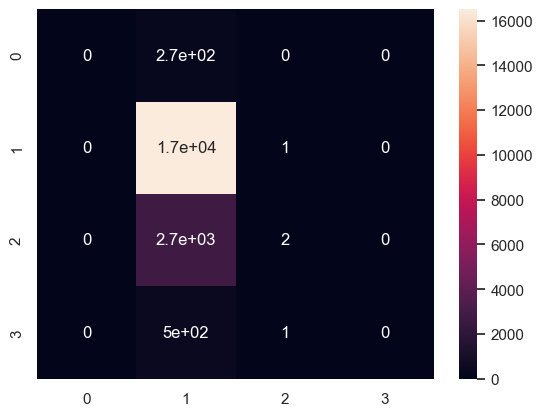

In [87]:
sns.heatmap(data= cm1, annot=True)
plt.show()

In [60]:
knn = KNeighborsClassifier(n_neighbors=7).fit(x_train, y_train)
accuracy = knn.score(x_test, y_test)
knn_predictions = knn.predict(x_test)
cm = confusion_matrix(y_test, knn_predictions)

In [61]:
accuracy_score(y_test,knn.predict(x_test))*100

81.66

In [103]:
print(mean_squared_error(y_test, knn.predict(x_test)))
print(mean_absolute_error(y_test, knn.predict(x_test)))
print(root_mean_squared_error(y_test, knn.predict(x_test)))

0.2568
0.2078
0.506754378372797


In [62]:
# creating a RF classifier
rfc = RandomForestClassifier()

# # Training the model on the training dataset
# # fit function is used to train the model using the training sets as parameters
rfc.fit(x_train, y_train)

# performing predictions on the test dataset

RandomForestClassifier()

In [63]:
rfc.score(x_test,y_test)*100

81.5

In [104]:
print(mean_squared_error(y_test, rfc.predict(x_test)))
print(mean_absolute_error(y_test, rfc.predict(x_test)))
print(root_mean_squared_error(y_test, rfc.predict(x_test)))

0.2606
0.2102
0.5104899607240088


In [65]:
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB

In [66]:
gnb = GaussianNB()
gnb.fit(x_train, y_train)

GaussianNB()

In [67]:
gnb.score(x_test,y_test)*100, gnb.score(x_train,y_train)*100

(80.71000000000001, 80.74)

In [68]:
bnb = BernoulliNB()
bnb.fit(x_train, y_train)

BernoulliNB()

In [69]:
bnb.score(x_test,y_test)*100, bnb.score(x_train,y_train)*100

(82.54, 82.44500000000001)

In [70]:
# mnb = MultinomialNB()
# mnb.fit(x_train, y_train)

In [105]:
print(mean_squared_error(y_test, gnb.predict(x_test)))
print(mean_absolute_error(y_test, gnb.predict(x_test)))
print(root_mean_squared_error(y_test, gnb.predict(x_test)))
print(mean_squared_error(y_test, bnb.predict(x_test)))
print(mean_absolute_error(y_test, bnb.predict(x_test)))
print(root_mean_squared_error(y_test, bnb.predict(x_test)))

0.2918
0.2258
0.5401851534427802
0.2475
0.1989
0.49749371855331


### K Means Clustering Model!

In [71]:
wcss = []
for i in range(2,21):
    kmn = KMeans(n_clusters=i ,init= 'k-means++')
    kmn.fit(x)
    wcss.append(kmn.inertia_)

In [72]:
wcss

[293178.13247755275,
 254936.64780888037,
 235307.76462247068,
 225227.1453981829,
 199387.54423321452,
 184762.7902895868,
 177304.86024398328,
 170845.73386401005,
 163239.0849566284,
 156899.03892924916,
 156014.04163834604,
 146062.8580874117,
 140932.1451539019,
 136159.32594756587,
 132476.12249251636,
 128748.40315937367,
 127146.06884119178,
 127639.27389069505,
 120997.80979287742]

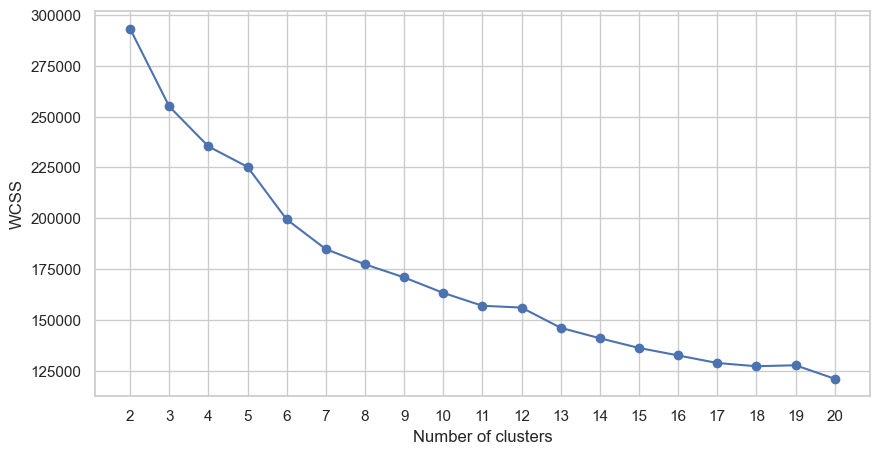

In [73]:
plt.figure(figsize=(10,5))
plt.plot([i for i in range(2,21)], wcss, marker ="o")
plt.xlabel("Number of clusters")
plt.xticks([i for i in range(2,21)])
plt.ylabel("WCSS")
plt.show()

In [90]:
kmn = KMeans(n_clusters=4,init= 'k-means++')
kmn.fit(x)

KMeans(n_clusters=4)

In [91]:
x["predicted_value"]= kmn.fit_predict(x)

In [92]:
accuracy_score(y_test,kmn.fit_predict(x_test))*100

23.43

In [112]:
x.head()

,Distance(mi),Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Weather_Condition,Precipitation(in),predicted_value
0,-0.387931,0.697284,-2.158608,0.644214,0.0,-0.224882,1.222356,-0.577450,0.0,0
1,-0.226154,0.189470,1.542140,0.687464,0.0,0.203364,0.595638,1.456081,0.0,3
2,-0.002204,0.471589,0.869277,0.860466,0.0,-1.081372,-0.448893,-0.577450,0.0,1
3,-0.394910,-0.826158,1.878572,-3.032059,0.0,-1.366869,-1.493424,0.801215,0.0,1
4,-0.210294,-0.656886,-0.091956,0.903716,0.0,-1.366869,-1.493424,-0.577450,0.0,1
